
### <center>Procesamiento Digital de Señales de Audio</center>
#### <center>Instituto de Ingeniería Eléctrica - UdelaR</center>
# Hoja de Ejercicios 2 - Curso 2022
## Introducción al procesamiento de audio.
### Filtros digitales en audio.

## Pautas para el práctico
 - La realización del presente trabajo es individual.
 - Se espera la entrega de un PDF escrito en $\LaTeX$ o similar. El mismo tendrá:
     - Máximo de 12 páginas
     - Máximo de 2500 palabras
 - También se espera la entrega del código escrito, en scripts Python o en este mismo Jupyter Notebook.
 - La corrección del práctico se hará sobre lo entregado en el PDF, pero podremos apoyarnos en el razonamiento y comprensión demostrado en el código escrito. Recomendamos escribir el código de forma prolija para facilitar la comprensión presente y futura tanto de nosotros como de ustedes mismxs.


**Nombre de el/la estudiante:** 

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, signal
from scipy.io.wavfile import read
from IPython.display import Audio

# Ejercicio 1

Al analizar una grabación de música con técnicas de procesamiento digital de señales, resulta de utilidad obtener una representación intermedia de la señal de audio que preserve sus principales propiedades rítmicas. Para generar tal representación, en [1] se propone descomponer la señal en bandas de frecuencia con un banco de filtros y calcular la envolvente de amplitud de la salida de cada filtro. Como forma de mostrar la validez de la propuesta, en [1] se plantea un experimento en el que al filtrar ruido blanco con el mismo banco de filtros, modular la salida de los filtros con las envolventes de amplitud previamente calculadas y sumar las señales de todas las bandas, se puede construir una nueva señal de audio que preserva las características rítmicas de la señal original.

## Parte 1


En la Figura 1 se muestra un diagrama de bloques del proceso, el cual se implementará en este ejercicio. Los pasos a seguir son los siguientes:  

---

<img src="./figures/diagrama.svg" alt="FIG 1" style="width: 600px;">

`FIG 1: Diagrama de bloques del procesamiento. Los filtros $H_1$ ... $H_n$ conforman el banco de filtros.`

---

Los pasos son los siguientes:

1. Implementar un banco de filtros Butterworth según la siguiente tabla. Se sugiere usar *scipy.signal.butter* y puede resultar útil consultar https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html


| Banda | f_low(Hz) | f_high(Hz) | tipo |
| :- | :---- | :---- | :--------------------- |
| 1 | - | 127 | pasa-bajo |
| 2 | 127 | 254 | pasa-banda |
| 3 | 254 | 508 | pasa-banda |
| 4 | 508 | 1016 | pasa-banda |
| 5 | 1016 | 2032 | pasa-banda |
| 6 | 2032 | - | pasa-alto |


2. Filtrar la señal de audio provista (*superstition.wav*) con el banco de filtros y graficar forma de onda y espectrograma de las señales resultantes.  
3. Calcular la envolvente temporal de cada una de las señales resultantes. Para ello se recomienda rectificar la señal y aplicar un filtro pasabajos.
4. Generar una señal de ruido blanco con la misma cantidad de muestras que la señal de audio y filtrarla con el banco de filtros de la parte 1. 
5. Modular en amplitud las señales de ruido filtrado con las envolventes calculadas en la parte 2. Escuchar el resultado para cada una de las bandas. 
6. Sumar las señales moduladas para obtener la salida y comparar auditivamente el contenido rítmico de la señal obtenida y la original. 

In [620]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = signal.butter(order, [low, high], btype='band', output='sos')
    return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.sosfilt(sos, data)
    return y

def butter_highpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    sos = signal.butter(order, high, btype='high', output='sos')
    return sos

def butter_highpass_filter(data, highcut, fs, order=5):
    sos = butter_highpass(highcut, fs, order=order)
    y = signal.sosfilt(sos, data)
    return y

def butter_lowpass(lowcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    sos = signal.butter(order, low, btype='low', output='sos')
    return sos

def butter_lowpass_filter(data, lowcut, fs, order=5):
    sos = butter_lowpass(lowcut, fs, order=order)
    y = signal.sosfilt(sos, data)
    return y

In [621]:
fs, song = io.wavfile.read("samples/audio_superstition.wav")
Audio(song, rate=fs)

In [622]:
def espectograma(x, fs, title=None):
    f, t, Sxx = signal.spectrogram(x, fs)
    plt.pcolormesh(t, f, 10 * np.log(Sxx))
    plt.xlabel("Tiempo(s)")
    plt.ylabel("Frecuencia(s)")
    plt.title(title)
    
def graficar_senial(x, fs, title=None, label=None):
    t = np.linspace(0, len(x)/fs, len(x))
    plt.plot(t, x, label=label)
    plt.title(title)
    if label is not None:
        plt.legend()
    plt.xlabel("Tiempo (s)")

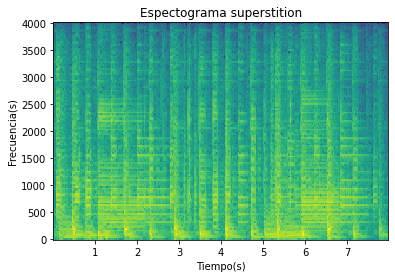

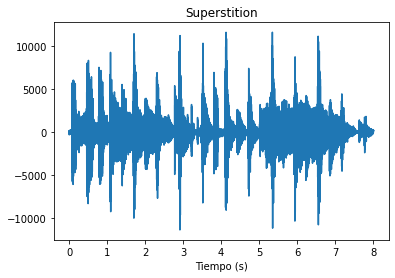

In [623]:
espectograma(song, fs, title='Espectograma superstition')
plt.show()
graficar_senial(song, fs, title="Superstition")

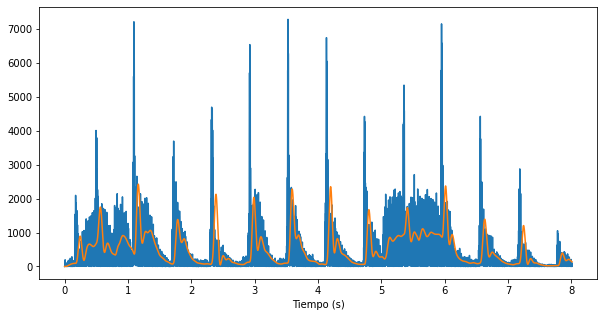

In [650]:
yh2 = butter_lowpass_filter(song, 127, fs)

rect_yh2 = abs(yh2)

rect_yh2_f = butter_lowpass_filter(rect_yh2, 10, fs)

# plt.figure(figsize=(10,5))
# graficar_senial(yh2, fs, title='Pasabajos')
# graficar_senial(rect_yh2_f, fs)
# plt.show()
plt.figure(figsize=(10,5))
graficar_senial(rect_yh2, fs, title='Pasabajos rectificado')
graficar_senial(rect_yh2_f, fs)
plt.show()

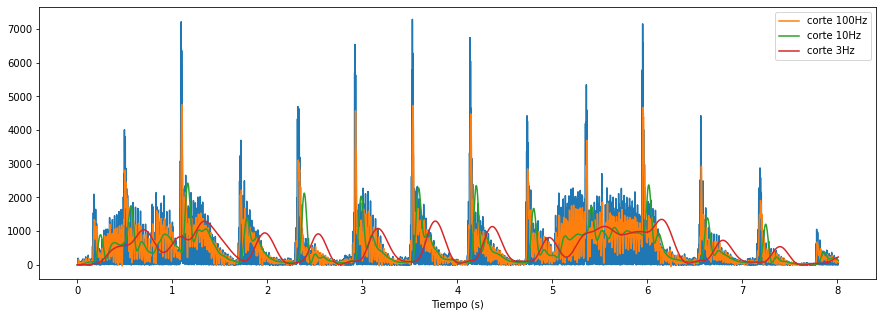

In [663]:
yh2 = butter_lowpass_filter(song, 127, fs)

rect_yh2 = abs(yh2)

rect_yh2_f_10 = butter_lowpass_filter(rect_yh2, 10, fs)
rect_yh2_f_100 = butter_lowpass_filter(rect_yh2, 100, fs)
rect_yh2_f_3 = butter_lowpass_filter(rect_yh2, 3, fs)

# plt.figure(figsize=(10,5))
# graficar_senial(yh2, fs, title='Pasabajos')
# graficar_senial(rect_yh2_f, fs)
# plt.show()
plt.figure(figsize=(15,5))
graficar_senial(rect_yh2, fs, title='Pasabajos rectificado')
graficar_senial(rect_yh2_f_100, fs, label='corte 100Hz')
graficar_senial(rect_yh2_f_10, fs, label='corte 10Hz')
graficar_senial(rect_yh2_f_3, fs, label='corte 3Hz')
plt.legend()
plt.show()

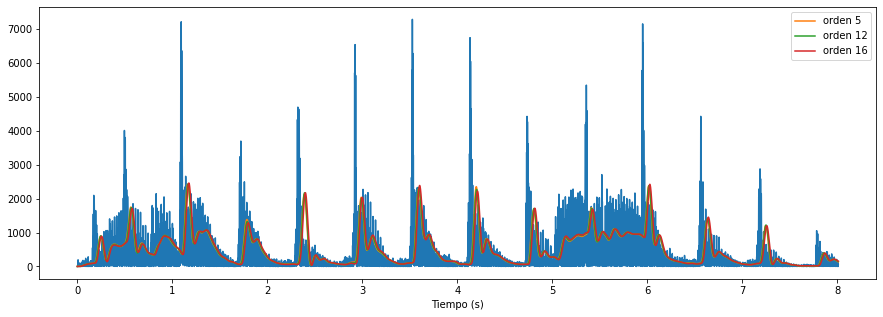

In [665]:
yh2 = butter_lowpass_filter(song, 127, fs)

rect_yh2 = abs(yh2)

rect_yh2_f_5 = butter_lowpass_filter(abs(butter_lowpass_filter(song, 127, fs)), 10, fs)
rect_yh2_f_12 = butter_lowpass_filter(abs(butter_lowpass_filter(song, 127, fs, order=8)), 10, fs)
rect_yh2_f_16 = butter_lowpass_filter(abs(butter_lowpass_filter(song, 127, fs, order=16)), 10, fs)

# plt.figure(figsize=(10,5))
# graficar_senial(yh2, fs, title='Pasabajos')
# graficar_senial(rect_yh2_f, fs)
# plt.show()
plt.figure(figsize=(15,5))
graficar_senial(rect_yh2, fs, title='Pasabajos rectificado')
graficar_senial(rect_yh2_f_5, fs, label='orden 5')
graficar_senial(rect_yh2_f_12, fs, label='orden 12')
graficar_senial(rect_yh2_f_16, fs, label='orden 16')
plt.legend()
plt.show()

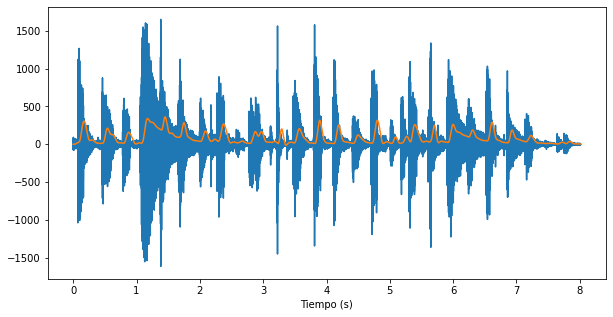

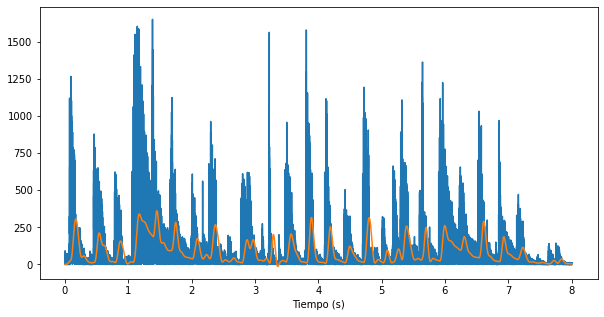

In [635]:
yh6 = butter_highpass_filter(song, 2032, fs)

rect_yh6 = abs(yh6)

rect_yh6_f = butter_lowpass_filter(rect_yh6, 10, fs)

plt.figure(figsize=(10,5))
graficar_senial(yh6, fs, title='Pasabajos')
graficar_senial(rect_yh6_f, fs)
plt.show()
plt.figure(figsize=(10,5))
graficar_senial(rect_yh6, fs, title='Pasabajos rectificado')
graficar_senial(rect_yh6_f, fs)
plt.show()

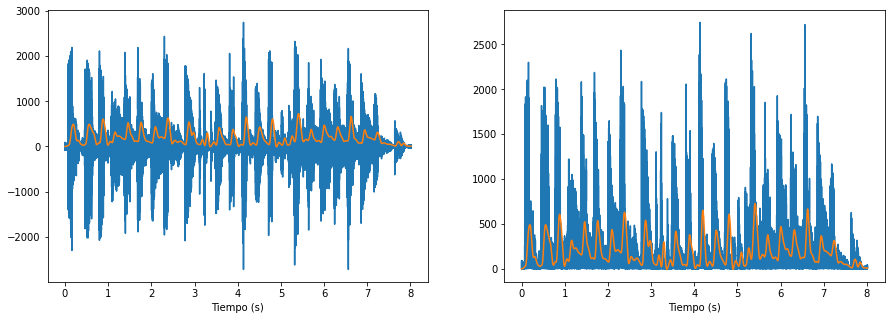

In [634]:
yh5 = butter_bandpass_filter(song, 1016, 2032, fs)

rect_yh5 = abs(yh5)

rect_yh5_f = butter_lowpass_filter(rect_yh5, 10, fs)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
graficar_senial(yh5, fs, title='Pasabajos')
graficar_senial(rect_yh5_f, fs)
plt.subplot(1,2,2)
graficar_senial(rect_yh5, fs, title='Pasabajos rectificado')
graficar_senial(rect_yh5_f, fs)
plt.show()

In [631]:
def calcular_envolventes(filtros: list, x: np.array, fs) -> list:
    """
    Cacular la envolvente resultante de cada filtro al pasar la señal.
    ------------------------------------------------------------------
    Entradas:
        - x: Señal a estudiar.
        - filtos: lista con tuplas de la forma:
            ('low', 'f_corte') los pasabajos
            ('high', 'f_corte') los pasaltos
            ('band', 'f_low', 'f_high') los pasabanda
    -----------------------------------------------------------------
    Salidas:
        - filtros: parametro de entrada
        - envolventes: lista con las envolventes
    """
    
    x = np.array(x)
    envolventes = list()
    
    for filtro in filtros:
        if filtro[0] == 'low':
            y = butter_lowpass_filter(x, filtro[1], fs, order=8)
        elif filtro[0] == 'high':
            y = butter_highpass_filter(x, filtro[1], fs, order=8)
        elif filtro[0] == 'band':
            y = butter_bandpass_filter(x, filtro[1], filtro[2], fs, order=8)
        
        y = butter_lowpass_filter(abs(y), 10, fs)
        envolventes.append(y)
    
    return filtros, envolventes

In [667]:
banco_filtros = [
    ('low', 127),
    ('band', 127, 254),
    ('band', 254, 508),
    ('band', 508, 1016),
    ('band', 1016, 2032),
    ('high', 2023)
]

filtros, envolventes = calcular_envolventes(banco_filtros, song, fs)

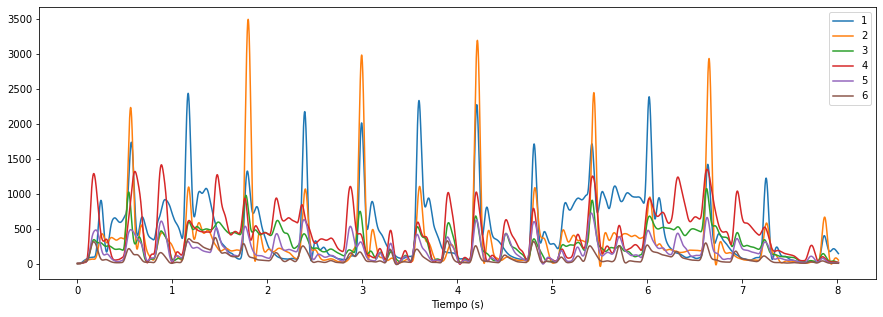

In [683]:
plt.figure(figsize=(15,5))
# graficar_senial(song, fs, label="Superstition")
for i, y in enumerate(envolventes):
    graficar_senial(y, fs, label=f"{i+1}")
plt.show()

In [638]:
def modular_envolventes(filtros, envolventes, x):
    
    result = np.zeros(x.shape)
    
    for i,  filtro in enumerate(filtros):
        if filtro[0] == 'low':
            y = butter_lowpass_filter(x, filtro[1], fs)
        elif filtro[0] == 'high':
            y = butter_highpass_filter(x, filtro[1], fs)
        elif filtro[0] == 'band':
            y = butter_bandpass_filter(x, filtro[1], filtro[2], fs)
            
        result += y * envolventes[i]
    
    return result

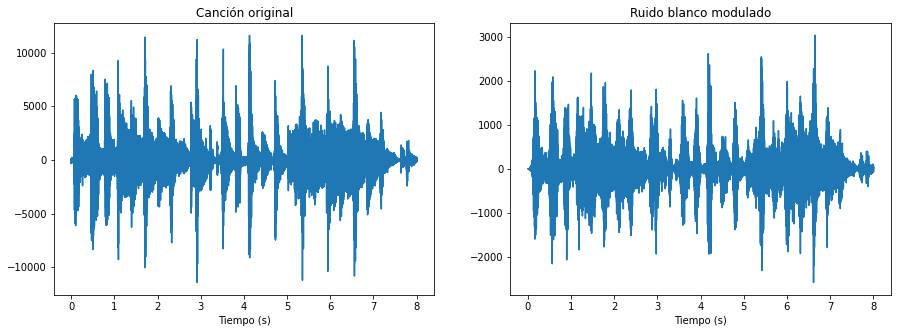

In [676]:
ruido = np.random.normal(0, scale=1.0, size=song.shape[0])
res = modular_envolventes(filtros, envolventes, ruido)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
graficar_senial(song, fs, title='Canción original')
plt.subplot(1,2,2)
graficar_senial(res, fs, title='Ruido blanco modulado')
plt.show()
Audio(res, rate=fs)

## Parte 2

Repita el procedimiento dividiendo el espectro en un número menor de bandas. Por ejemplo, para un total de 3 bandas, considere las bandas 1-2, 3-4 y 5-6. Compare el resultado perceptivo con el que se obtiene en la parte anterior.  

In [640]:
banco_filtros = [
    ('low', 674),
    ('band', 674, 1348),
    ('high', 1348)
]1

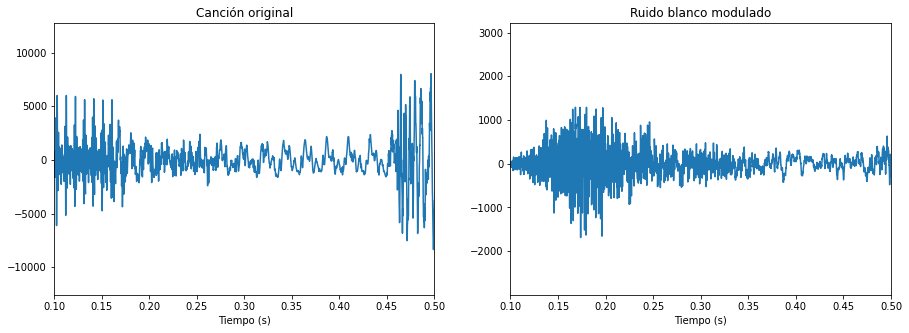

In [686]:
filtros, envolventes = calcular_envolventes(banco_filtros, song, fs)

ruido = np.random.normal(0, scale=1.0, size=song.shape[0])
res = modular_envolventes(filtros, envolventes, ruido)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
graficar_senial(song, fs, title='Canción original')
plt.xlim(0.1,0.5)
plt.subplot(1,2,2)
graficar_senial(res, fs, title='Ruido blanco modulado')
plt.xlim(0.1,0.5)
plt.show()
Audio(res, rate=fs)

# Ejercicio 2

En este ejercicio se implementa el algoritmo de Karplus y Strong para síntesis de cuerda pulsada [2]. Se sugiere consultar [3] por una descripción detallada.


## Parte 1

Como primer paso se estudia la respuesta al impulso de un filtro peine.


1. Escribir la ecuación en recurrencia de un filtro peine en función del retardo $L$ y la atenuación por muestra $R$ del filtro. Indicar la frecuencia fundamental de la respuesta al impulso en función de los parámetros del filtro y la frecuencia de muestreo ¿Es posible conseguir una respuesta al impulso con frecuencia fundamental arbitraria?
2. Sintetizar las 12 notas de una octava de la *escala igualmente temperada* (en el temperamento igual se divide la octava en 12 intervalos iguales, de modo que las frecuencias de dos notas consecutivas cumplen la relación $f_{n+1} = f_{n} \, 2^{(\frac{1}{12})}$) comenzando en $220$Hz ($A3$). Para esto, se sugiere hacer lo siguiente:

     - Calcular el parámetro $L$ del filtro para que la frecuencia fundamental de la respuesta al impulso sea lo más cercana posible a la nota deseada. Utilice una frecuencia de muestreo de $f_s$ = $22050$Hz).

     - Filtrar un impulso con cada uno de los filtros diseñados.
     - Concatenar la respuesta al impulso de cada filtro para obtener una señal con todas las notas.
    

3. Variar el parámetro $R$ y analizar su efecto mediante un espectrograma. 
4. Comparar el resultado obtenido con una cuerda pulsada real.

In [560]:
fs = 22050
R = 0.99992
temp = 2**(1/12)

In [561]:
# valor de L mas cercano
L = round(fs/220)

In [562]:
N = 50000
impulse = np.zeros(N)
impulse[0] = 1

In [589]:
notas = []
for i in range(0,12):
    f0 = 220 * (temp**i)
    L = round(fs/f0)
    y = np.zeros(N)
    for k in range(0, N//L):
        y[k*L] = R**(k*L)
    notas.append(y)

In [590]:
continuo = np.hstack(notas)

In [591]:
Audio(continuo, rate=fs)

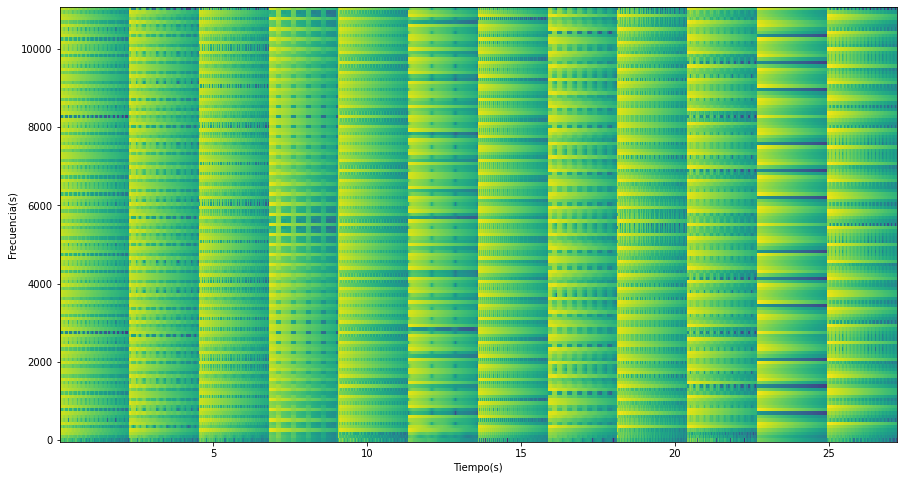

In [593]:
plt.figure(figsize=(15,8))
espectograma(continuo, fs)
plt.show()

In [594]:
R = 0.999

In [595]:
notas = []
for i in range(0,12):
    f0 = 220 * (temp**i)
    L = round(fs/f0)
    y = np.zeros(N, dtype=np.float128)
    for k in range(0, N//L):
        y[k*L] = R**(k*L)
    notas.append(y)
continuo = np.hstack(notas)

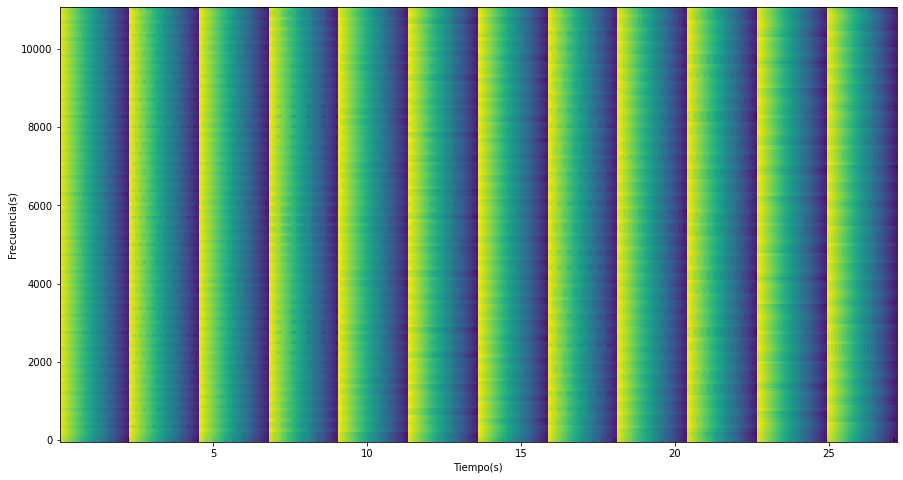

In [596]:
plt.figure(figsize=(15,8))
espectograma(continuo, fs)
plt.show()
Audio(continuo, rate=fs)

## Parte 2

Como primer refinamiento del modelo se incluye un filtro pasabajos en el lazo de realimentación. 
En [2] se usa un filtro de media móvil de primer orden ($M=2$).


1. ¿Qué característica de la señal de una cuerda pulsada modela este filtro?
1. Calcular la ecuación en recurrencia del filtro peine incluyendo el pasabajos en el lazo de realimentación.
1. Indicar la frecuencia fundamental de la respuesta al impulso en función de los parámetros del filtro peine y la frecuencia de muestreo.
1. Repetir el punto 2 de la parte 1 con el sistema incluyendo el pasabajos.
1. Evaluar auditivamente el resultado de la síntesis al agregar el pasabajos.

In [614]:
# Filtro media movil orden 1

R = 0.99992

notas_LPF = []
for i in range(0,12):
    f0 = 220 * (temp**i)
    L = round(fs/f0)
    y = np.zeros(N)
    # primeras L muestras
    y[0] = 1/2
    y[1] = 1/2
    y[L] = 0.5*(R**L)
    for n in range(L+1, N):
        y[n] = 1/2* R**L *(y[n-L] + y[n-L-1])
    notas_LPF.append(y)
continuo = np.hstack(notas_LPF)

/var/folders/rm/3gw_sd391tdb4y6rh5dznxdh0000gt/T/ipykernel_57877/3720928646.py:3: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(t, f, 10 * np.log(Sxx))


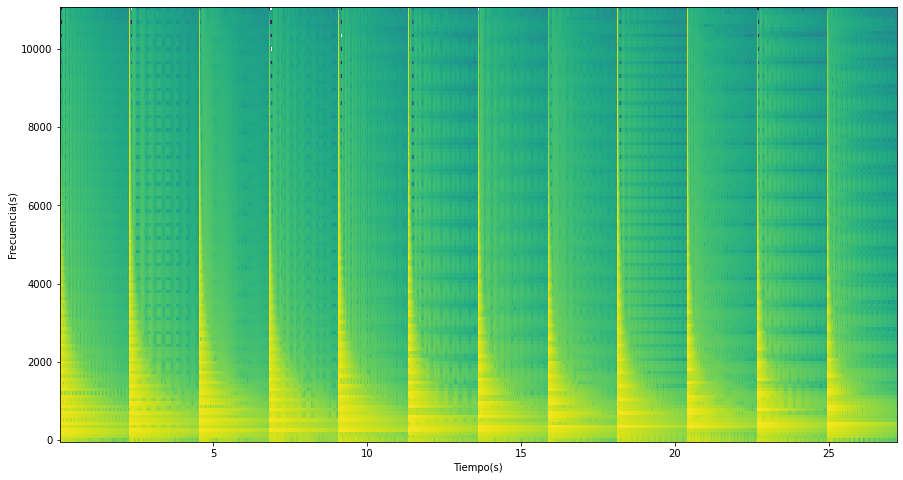

In [615]:
plt.figure(figsize=(15,8))
espectograma(continuo, fs)
plt.show()
Audio(continuo, rate=fs)

## Parte 3

Como segunda etapa de refinamiento del modelo se incluye un filtro pasatodos (con un polo en \(a\) y un cero en \(1/a\)) en serie con el filtro pasabajos.

Su objetivo es crear retardos fraccionarios para producir frecuencias fundamentales arbitrarias.


1. Calcular la ecuación en recurrencia del filtro peine incluyendo el pasabajos y el pasatodos en el lazo de realimentación.
1. Indicar la frecuencia fundamental de la respuesta al impulso en función de los parámetros de los filtros peine y pasatodos, y la frecuencia de muestreo.
1. Repetir el punto 2 de la parte 1 afinando el sistema en la frecuencia exacta de las notas de la escala. En el primer paso además de calcular el parámetro \(L\) del filtro peine hay que calcular el parámetro \(a\) del filtro pasatodos. 
1. Calcular experimentalmente el error (en Hz) entre la frecuencia fundamental de cada nota sintetizada y su correspondiente en la escala temperada, con y sin el uso del filtro pasatodos. ¿A qué se debe dicho error?

**Observación:** como la frecuencia fundamental de una nota no varía en el tiempo, es posible obtener una estimación bastante precisa mediante la detección del primer pico de la DFT de la señal completa de la nota.

In [601]:
from math import floor

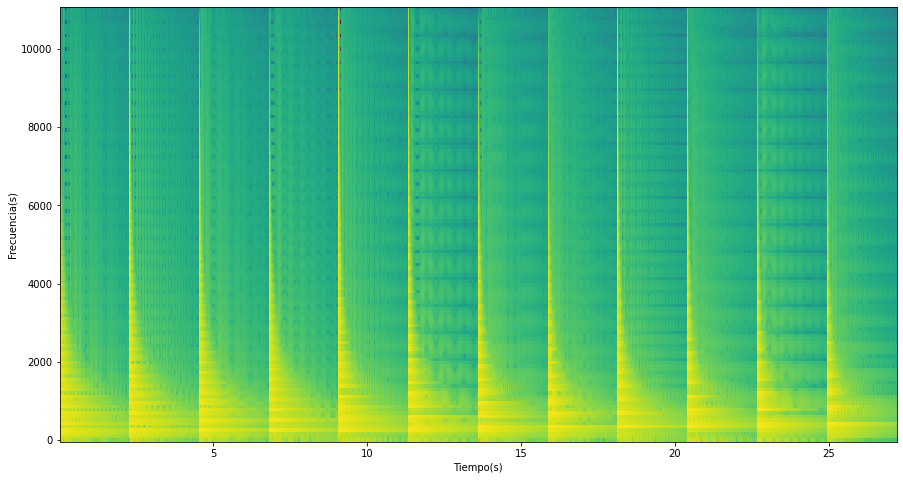

In [690]:
fs = 22050
R = 0.99992
N = 50000

notas_APF = list()

x = np.zeros(N)
x[0] = 1

for i in range(12):
    f0 = 220*(2)**(i/12)
    
    L = floor(fs/f0 - 0.5)

    delta = fs/f0 - 0.5 - L
    a = ( delta - 1 ) / ( 1 + delta )
    
    y = np.zeros(N)
    
    R_L = R**L
    for n in range(0, N):
        y[n] = a * y[n-1] + 0.5 * (-a*(x[n] + x[n-1]) + x[n-1] + x[n-2]) + \
                0.5 * (- a*R_L*(y[n-L] + y[n-L-1]) + R_L*y[n-L-1] + R_L*y[n-L-2])
        
    notas_APF.append(y)

continuo = np.hstack(notas_APF)
plt.figure(figsize=(15,8))
espectograma(continuo, fs)
plt.show()
Audio(continuo, rate=fs)

In [691]:
Audio(notas_LPF[7], rate=fs)

In [692]:
Audio(notas_APF[7], rate=fs)

In [693]:
frec_temp = [220*(2**(i/12)) for i in range(0,12)]

In [694]:
from scipy.fft import fft

In [695]:
frec_notas = list()
frec_notas_LPF = list()
frec_notas_APF = list()

for nota in notas:
    frec_notas.append(signal.find_peaks(abs(fft(nota)))[0][0] * (fs/N))

for nota in notas_LPF:
    frec_notas_LPF.append(signal.find_peaks(abs(fft(nota)[:N//2]))[0][0] * (fs/N))
    
for nota in notas_APF:
    frec_notas_APF.append(signal.find_peaks(abs(fft(nota)[:N//2]))[0][0] * (fs/N))

In [697]:
print("Objetivo\tPeine\t\tLPF\t\tAPF")
print("---------------------------------------------------------")
for i in range(0, 12):
    print(f"{frec_temp[i]:0.5f}\t{frec_notas[i]:0.5f}\t{frec_notas_LPF[i]:0.5f}\t{frec_notas_APF[i]:0.5f}\t")

Objetivo	Peine		LPF		APF
---------------------------------------------------------
220.00000	220.50000	219.61800	220.05900	
233.08188	231.96600	231.08400	233.28900	
246.94165	247.84200	246.51900	246.96000	
261.62557	262.39500	261.07200	261.51300	
277.18263	275.62500	273.86100	277.38900	
293.66477	294.14700	291.94200	293.70600	
311.12698	310.46400	308.25900	311.34600	
329.62756	328.98600	326.78100	329.42700	
349.22823	350.15400	347.06700	349.27200	
369.99442	367.35300	364.26600	369.99900	
391.99544	393.81300	390.28500	392.04900	
415.30470	415.86300	412.33500	415.42200	


# Referencias

[1] Scheirer, Eric D, "Tempo and beat analysis of acoustic musical signals", *The Journal of the Acoustical Society of America,* vol. 103, no.1, pp.588 601, 1998.

[2] Kevin Karplus and Alex Strong, "Digital Synthesis of Plucked String and Drum Timbres", *Computer Music Journal,* vol.7, no.2, pp. 43-55, 1983.

[3] Ken Steiglitz, *Digital Signal Processing Primer: With Applications to Digital Audio and Computer Music,* ch. Comb and String Filters. Prentice Hall, 1996.
